In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("FlightPassengerData.xlsx")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Dataset Explanation:

**Num_Passengers** : Total number of Passengers in that journey in a group<br>
**sales_channel** : Platform used for booking ticket<br>
**trip_type** : RoundTrip,OnewayTrip,CircleTrip<br>
**length_of_stay** : how many hours stayed in destination<br>
**Flight_hour** : Total duration of flight travelling<br>
**Flight_day** : Day of boarding flight<br>
**Route** : Route of flight to reach its destination<br>
**booking_origin** : The country where ticket was actually booked<br>
**wants_extra_baggage** : Yes/No<br> 
**wants_preferred_seat** : Yes/No<br> 
**wants_in_flight_meals** : Yes/No<br> 
**Flight_duration**: Duration of flight<br>
**booking_complete** : Yes/No<br> 

# Data Preprocessing

In [4]:
#Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,round(pct_missing*100)))

num_passengers - 0%
sales_channel - 0%
trip_type - 0%
purchase_lead - 0%
length_of_stay - 0%
flight_hour - 0%
flight_day - 0%
route - 0%
booking_origin - 0%
wants_extra_baggage - 0%
wants_preferred_seat - 0%
wants_in_flight_meals - 0%
flight_duration - 0%
booking_complete - 0%


In [5]:
df.shape

(50000, 14)

In [6]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [7]:
col = df.columns
col

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [8]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [9]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [10]:
df.duplicated().sum()

719

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# EDA

### Univariate Analysis

In [13]:
num_col = df[['length_of_stay','flight_hour','flight_duration']]

<Axes: xlabel='wants_extra_baggage', ylabel='count'>

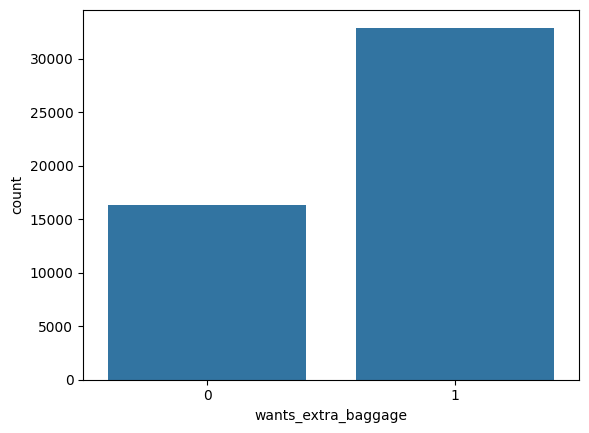

In [14]:
sns.countplot(x='wants_extra_baggage',data=df)

In [15]:
cols = df[['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','booking_complete']]

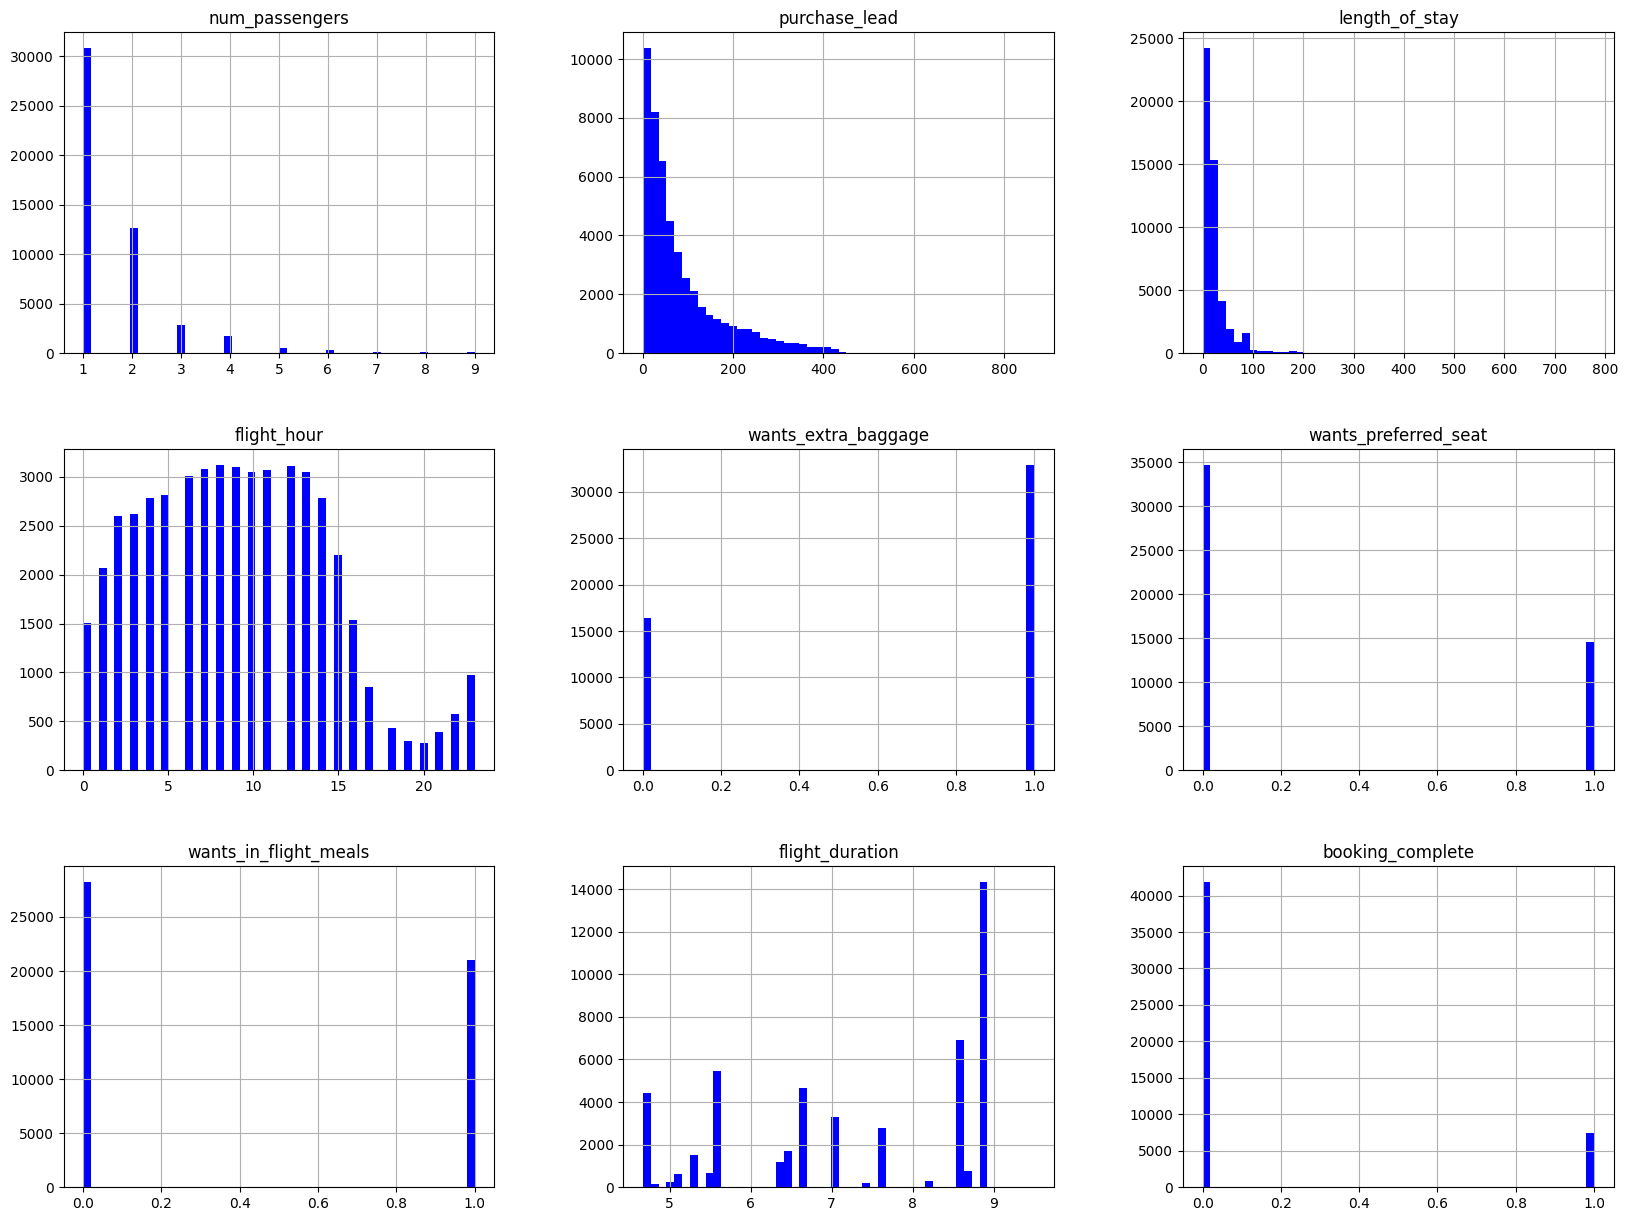

In [16]:

df.hist(bins=50,figsize=(20,15),color='blue')
plt.show()

In [17]:
cat_col = ['sales_channel','trip_type','flight_day']

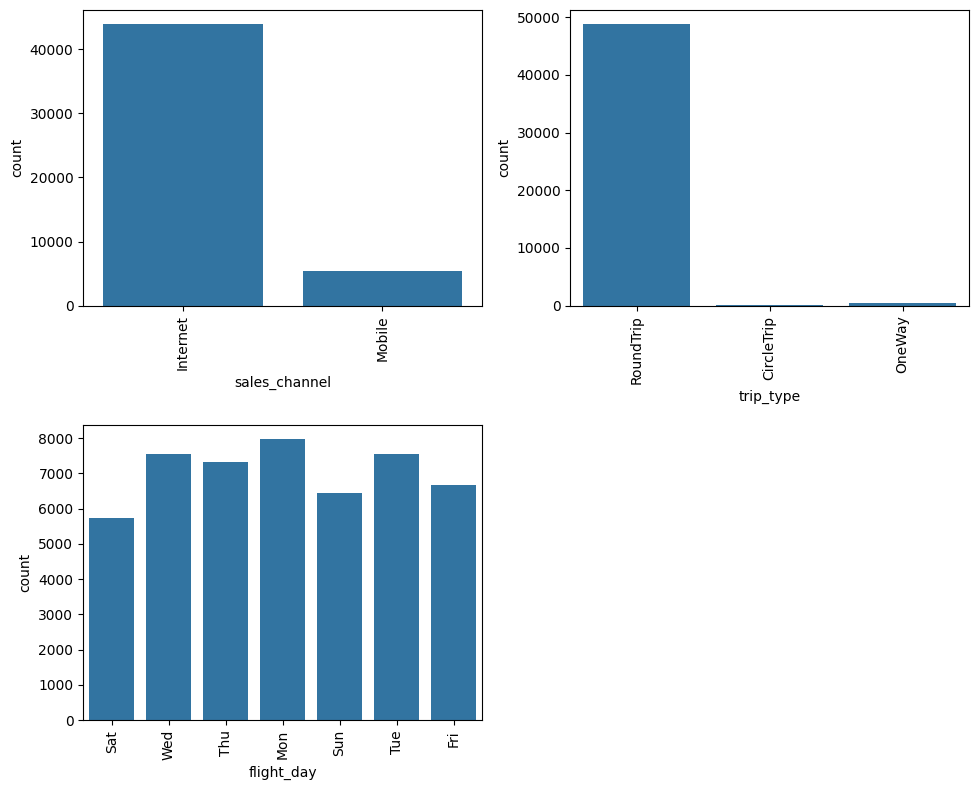

In [18]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
axs=axs.flatten()

for i,var in enumerate(cat_col):
    sns.countplot(x=var,data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
fig.delaxes(axs[3]) #Removing 4th axes
plt.show()

In [19]:
num_var=['purchase_lead','length_of_stay','flight_hour','flight_duration']

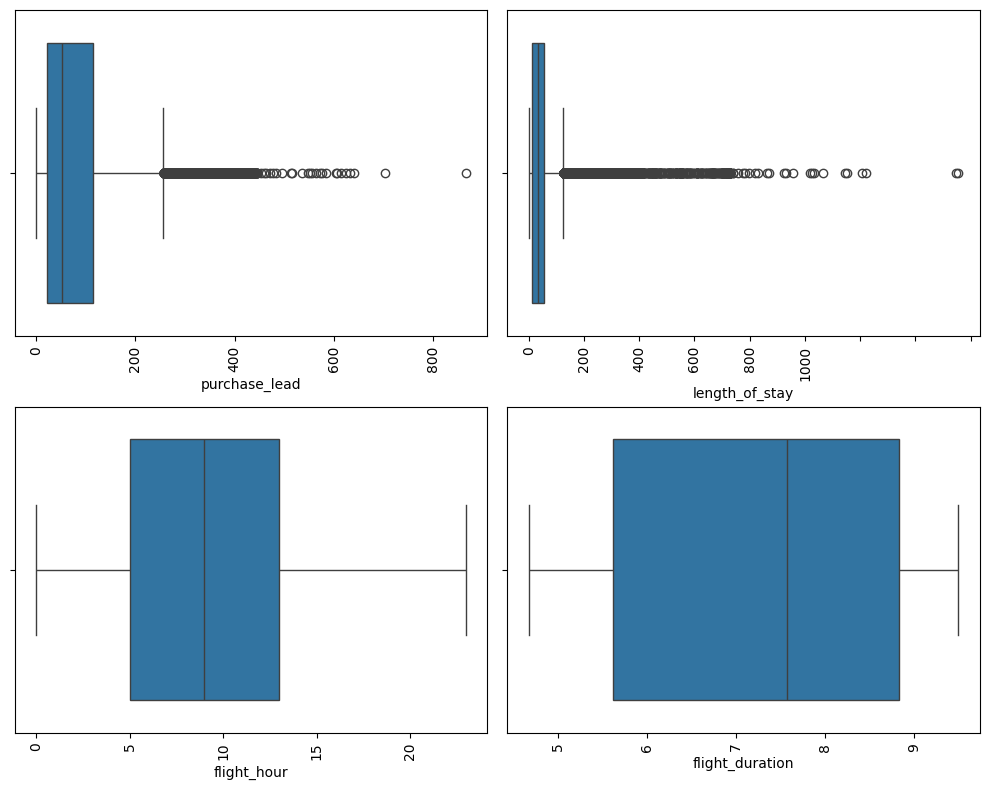

In [20]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
axs=axs.flatten()

for i,var in enumerate(num_var):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

# Outliers Treatment

In [21]:
percentile25 = df['purchase_lead'].quantile(0.25)
percentile75 = df['purchase_lead'].quantile(0.75)

In [22]:
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [23]:
df['purchase_lead'] = np.where(
    df['purchase_lead'] > upper_limit,
    upper_limit,
    np.where(
        df['purchase_lead'] < lower_limit,
        lower_limit,
        df['purchase_lead']
    )
)

In [24]:
percentile25_1 = df['length_of_stay'].quantile(0.25)
percentile75_1 = df['length_of_stay'].quantile(0.75)

In [25]:
iqr=percentile75_1-percentile25_1
upper_limit = percentile75_1 + 1.5 * iqr
lower_limit = percentile25_1 - 1.5 * iqr

In [26]:
df['length_of_stay'] = np.where(
    df['length_of_stay'] > upper_limit,
    upper_limit,
    np.where(
        df['length_of_stay'] < lower_limit,
        lower_limit,
        df['length_of_stay']
    )
)

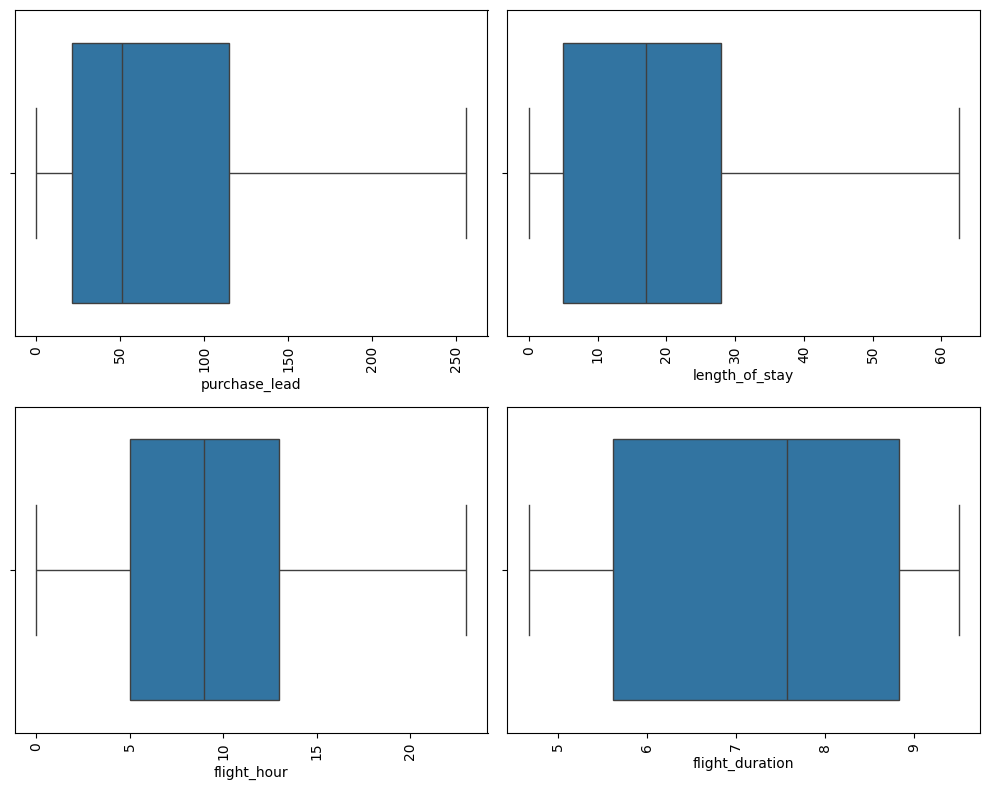

In [27]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
axs=axs.flatten()

for i,var in enumerate(num_var):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

# Encoding Categorical data

In [28]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object'])

In [29]:
categorical_features.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [31]:
encoder = LabelEncoder()
df['sales_channel'] = encoder.fit_transform(df['sales_channel'])
df['trip_type'] = encoder.fit_transform(df['trip_type'])
df['flight_day'] = encoder.fit_transform(df['flight_day'])
df['route'] = encoder.fit_transform(df['route'])
df['booking_origin'] = encoder.fit_transform(df['booking_origin'])

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,256.0,19.0,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112.0,20.0,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243.0,22.0,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96.0,31.0,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68.0,22.0,15,6,0,36,1,0,1,5.52,0


In [33]:
df['route'].value_counts()

route
6      2620
717     912
633     833
436     793
287     729
       ... 
1         1
466       1
467       1
244       1
672       1
Name: count, Length: 799, dtype: int64

# Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Decision Tree 

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Using GridSearchCV for hyperparameter Tuning

In [ ]:
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [37]:
y_pred = dtree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 64.52 %


In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6452267424165568
Precision Score :  0.6452267424165568
Recall Score :  0.6452267424165568
Jaccard Score :  0.4762617942189606
Log Loss :  12.787324328065605


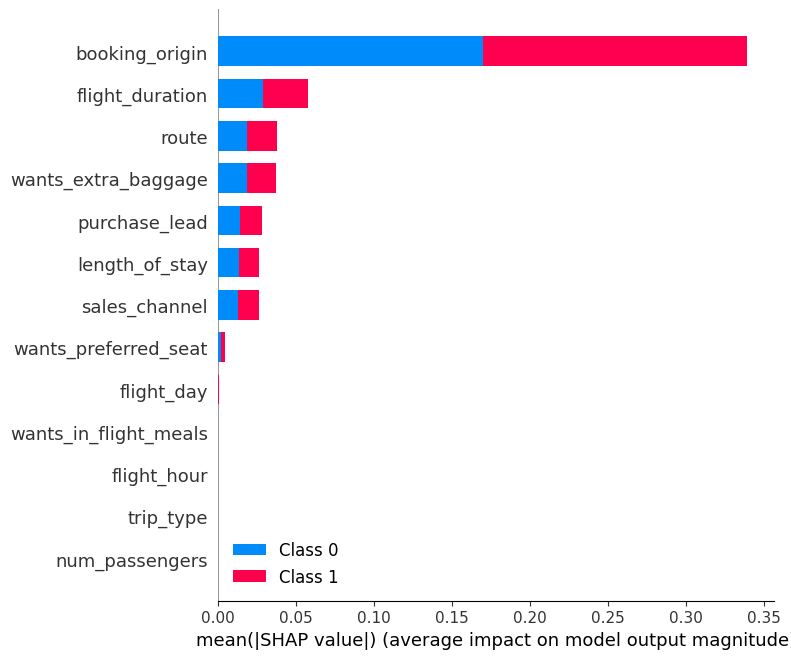

In [39]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

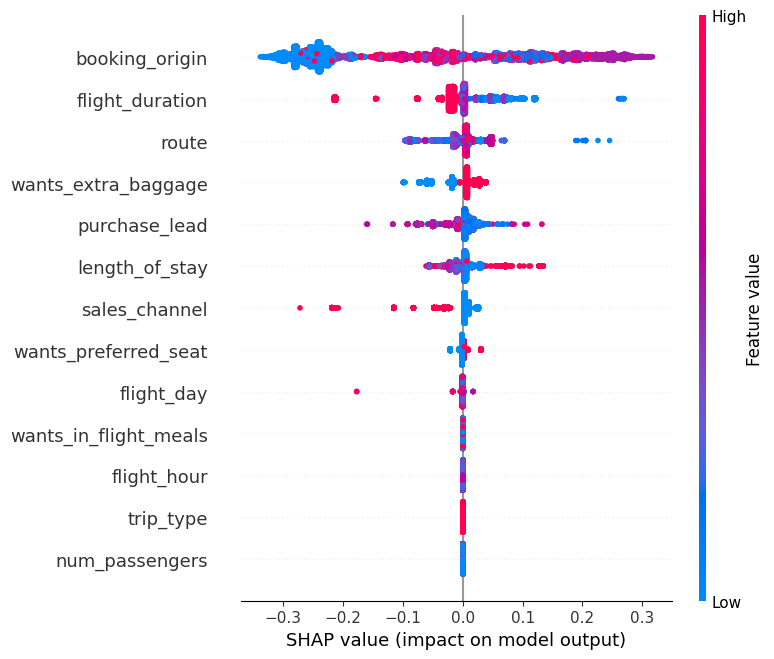

In [40]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test.values, feature_names = x_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6452267424165568')

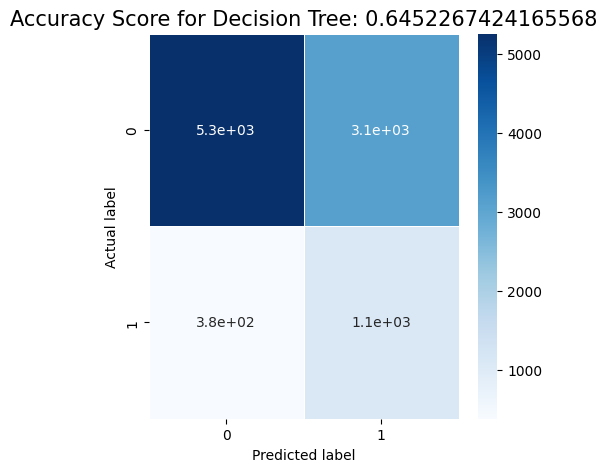

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

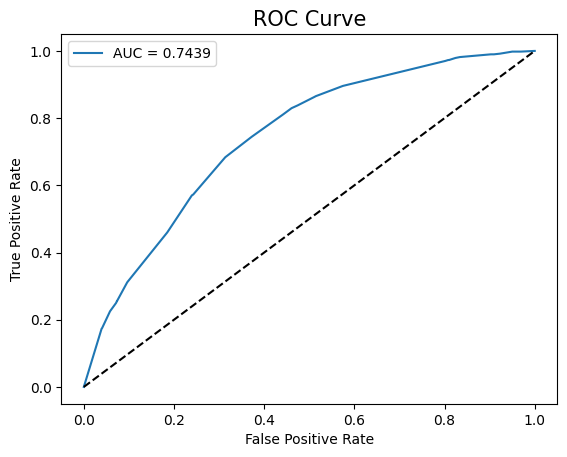

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### Random Forest

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [43]:
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, max_depth=None)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [44]:
y_pred = rfc.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.2 %


In [45]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8519833620777114
Precision Score :  0.8519833620777113
Recall Score :  0.8519833620777113
Jaccard Score :  0.7421350300459526
Log Loss :  5.335060393093428


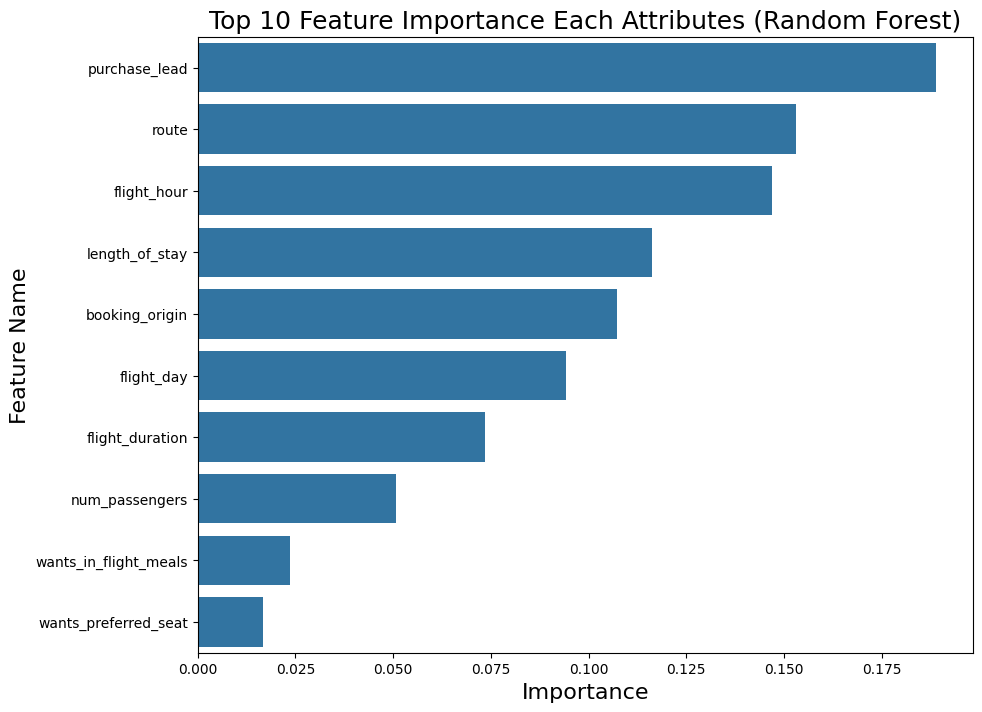

In [46]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8519833620777113')

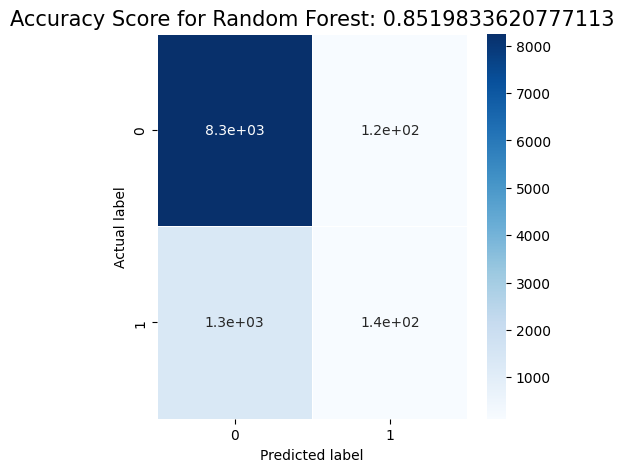

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [48]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8519833620777114
Precision Score :  0.8519833620777113
Recall Score :  0.8519833620777113
Jaccard Score :  0.7421350300459526
Log Loss :  5.335060393093428


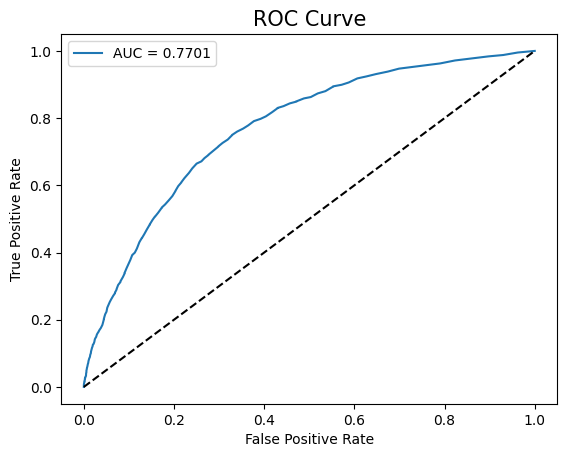

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [50]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)
accuracy_test = naive_bayes.score(x_test,y_test)
accuracy_train = naive_bayes.score(x_train,y_train)
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8143451354367455
Precision Score :  0.8143451354367455
Recall Score :  0.8143451354367455
Jaccard Score :  0.6868315222041584
Log Loss :  6.691679588321435


In [51]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(x_train,y_train)

y_pred = logistic_regression.predict(x_test)

In [52]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8499543471644516
Precision Score :  0.8499543471644516
Recall Score :  0.8499543471644516
Jaccard Score :  0.739061397318278
Log Loss :  5.408193503348309


In [53]:
svm_classifier = SVC(kernel='rbf')  # You can also try 'rbf', 'poly', 'sigmoid' kernels

# Train the classifier
svm_classifier.fit(x_train, y_train)

SVC()

In [54]:
y_pred = svm_classifier.predict(x_test)
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8499543471644516
Precision Score :  0.8499543471644516
Recall Score :  0.8499543471644516
Jaccard Score :  0.739061397318278
Log Loss :  5.408193503348309


# Conclusion:
**Best classifier model**  : Random Forest Classifier<br>
**Most Impact feature**: purchase_lead